In [1]:
!pip install shap==0.23.1
#!pip install shap==0.28.3

     |████████████████████████████████| 184kB 4.3MB/s 
  Created wheel for shap: filename=shap-0.23.1-cp36-cp36m-linux_x86_64.whl size=230192 sha256=a177bd57862d2866db1b4c5c8eb1af413f26bfb865cceb816a9b2c0a2bee483c
  Stored in directory: /root/.cache/pip/wheels/d6/de/04/90cd2eab45f542feeff51aa672926157db2aa06ff07e879c5e
Successfully built shap


In [2]:
import shap
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats  import entropy
import matplotlib.pyplot as plt

#COMPAS

In [3]:
def plot_shap_graph(dataset):
  if dataset == "compas":
    shap_values = pd.read_csv("shap_random.csv")
    data_final = pd.read_csv("compas_processed.csv")
    independent_columns  = ['priors_count','age_cat_25_45', 'age_cat_Greaterthan45',
       'age_cat_Lessthan25','race_random_African_American',
       'race_random_Caucasian',
       'sex_Female', 'sex_Male', 'c_charge_degree_M','c_charge_degree_F']

    X =  data_final.loc[:, independent_columns]
    sns.set()
    shap.summary_plot(shap_values.values, X)

    shap_values = pd.read_csv("shap_normal.csv")
    independent_columns  = ['priors_count','age_cat_25_45', 'age_cat_Greaterthan45',
       'age_cat_Lessthan25', 'race_African_American',
       'race_Caucasian',
       'sex_Female', 'sex_Male', 'c_charge_degree_M','c_charge_degree_F']

    X =  data_final.loc[:, independent_columns]

    sns.set()
    shap.summary_plot(shap_values.values, X)

  elif dataset == "adult":
    shap_values = pd.read_csv("Adult_census_shap_randomized_1.csv")
    data_final = pd.read_csv("Adult_processed.csv")
    independent_columns  = list(data_final)

    X =  data_final.loc[:, independent_columns]

    sns.set()
    shap.summary_plot(shap_values.values, X, max_display=shap_values.shape[1])



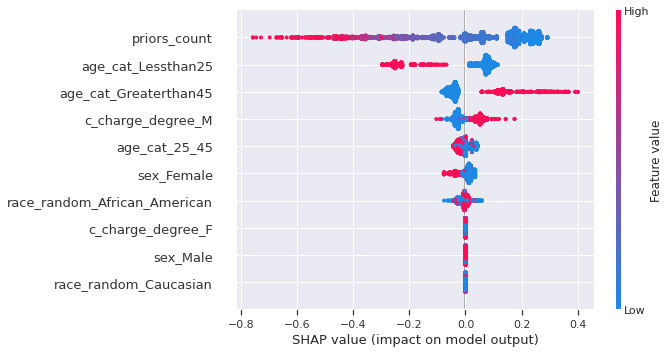

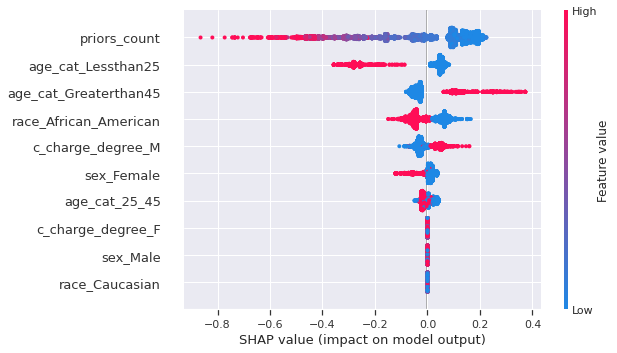

In [4]:
plot_shap_graph("compas")

In [5]:
def get_pmf(data, num_bins = 100):
  counts, bins = np.histogram(data ,bins=num_bins)
  bins = bins[:-1] + (bins[1] - bins[0])/2
  probs = counts/float(counts.sum())
  return probs

In [6]:
random_shap_values = pd.read_csv("shap_random.csv")
normal_shap_values = pd.read_csv("shap_normal.csv")

In [7]:
location_afam  =  normal_shap_values.columns.get_loc("race_African_American")
location_caucasian = normal_shap_values.columns.get_loc("race_Caucasian")
location_rand = random_shap_values.columns.get_loc("race_random_African_American")

locations_interested = [location_afam,location_caucasian, location_rand]

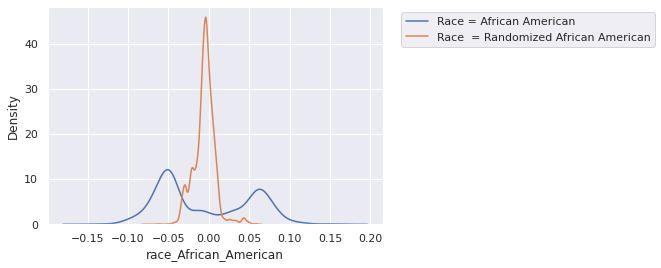

KL Divergence of the two distributions 1.3267433159442072
KL Divergence of the two distributions 1.4792272185591044


In [8]:
#plt.figure("Demographic parity in race")
sns.kdeplot(normal_shap_values.iloc[:, location_afam], label = 'Race = African American')
sns.kdeplot(random_shap_values.iloc[:, location_rand], label = 'Race  = Randomized African American')

pmf_rand =  get_pmf(random_shap_values.iloc[:, location_rand])
pmf_orig =  get_pmf(normal_shap_values.iloc[:, location_afam])
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))


In [9]:
data_final = pd.read_csv("compas_processed.csv")

In [10]:
Y_1_AF =  data_final[(data_final['is_recid']==0) & (data_final['race_African_American']==1)].index
Y_1_C = data_final[(data_final['is_recid']==0) & (data_final['race_African_American']==0)].index

Y_1_AF_random =  data_final[(data_final['is_recid']==0) & (data_final['race_random_African_American']==1)].index
Y_1_C_random = data_final[(data_final['is_recid']==0) & (data_final['race_random_African_American']==0)].index

Y_0_AF =  data_final[(data_final['is_recid']==1) & (data_final['race_African_American']==1)].index
Y_0_C = data_final[(data_final['is_recid']==1) & (data_final['race_African_American']==0)].index

Y_0_AF_random =  data_final[(data_final['is_recid']==1) & (data_final['race_random_African_American']==1)].index
Y_0_C_random = data_final[(data_final['is_recid']==1) & (data_final['race_random_African_American']==0)].index

print(len(Y_0_AF))
print(len(Y_0_C))
print(len(Y_0_AF_random))
print(len(Y_0_C_random))
print()

print(len(Y_1_AF))
print(len(Y_1_C))
print(len(Y_1_AF_random))
print(len(Y_1_C_random))

1773
874
1608
1039

1402
1229
1567
1064


In [13]:
X = data_final
X_set =  X.iloc[Y_0_AF]
shap_values_set =  normal_shap_values.iloc[X_set.index,:]
y_0_afam_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_0_C]
shap_values_set =  normal_shap_values.iloc[X_set.index,:]
y_0_caucasian_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_0_AF_random]
shap_values_set =  random_shap_values.iloc[X_set.index,:]
y_0_afam_random_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_0_C_random]
shap_values_set =  random_shap_values.iloc[X_set.index,:]
y_0_caucasian_random_values =  shap_values_set.iloc[:, locations_interested]

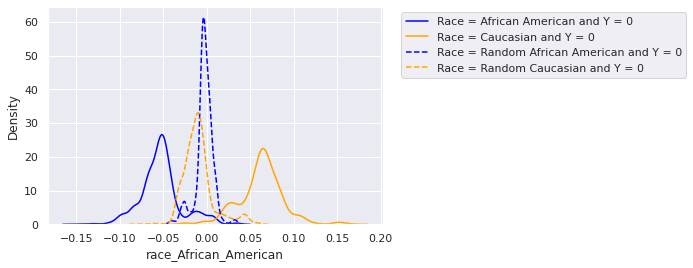

In [14]:
sns.kdeplot(y_0_afam_values.iloc[:,0], label = 'Race = African American and Y = 0', color='blue')
sns.kdeplot(y_0_caucasian_values.iloc[:,0], label = 'Race = Caucasian and Y = 0', color='orange')
sns.kdeplot(y_0_afam_random_values.iloc[:,0], label = 'Race = Random African American and Y = 0', linestyle="--", color='blue')
sns.kdeplot(y_0_caucasian_random_values.iloc[:,0], label = 'Race = Random Caucasian and Y = 0',linestyle="--", color='orange')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

# pmf_rand =  get_pmf(y_0_afam_values)
# pmf_orig =  get_pmf(y_0_caucasian_values)

# print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
# print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

# pmf_rand =  get_pmf(y_0_afam_random_values)
# pmf_orig =  get_pmf(y_0_caucasian_random_values)

# print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
# print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

In [17]:
X_set =  X.iloc[Y_1_AF]
shap_values_set =  normal_shap_values.iloc[X_set.index,:]
y_1_afam_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_1_C]
shap_values_set =  normal_shap_values.iloc[X_set.index,:]
y_1_caucasian_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_1_AF_random]
shap_values_set =  random_shap_values.iloc[X_set.index,:]
y_1_afam_random_values =  shap_values_set.iloc[:, locations_interested]


X_set =  X.iloc[Y_1_C_random]
shap_values_set =  random_shap_values.iloc[X_set.index,:]
y_1_caucasian_random_values =  shap_values_set.iloc[:, locations_interested]

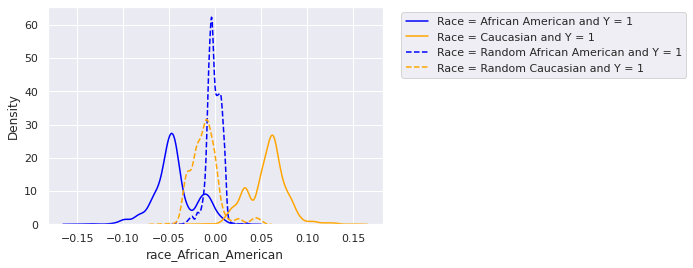

In [18]:
sns.kdeplot(y_1_afam_values.iloc[:,0], label = 'Race = African American and Y = 1', color='blue')
sns.kdeplot(y_1_caucasian_values.iloc[:,0], label = 'Race = Caucasian and Y = 1', color='orange')
sns.kdeplot(y_1_afam_random_values.iloc[:,0], label = 'Race = Random African American and Y = 1', linestyle="--", color='blue')
sns.kdeplot(y_1_caucasian_random_values.iloc[:,0], label = 'Race = Random Caucasian and Y = 1', linestyle="--", color='orange')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
#pmf_rand =  get_pmf(y_1_afam_values.iloc[:,0])
#pmf_orig =  get_pmf(y_1_caucasian_values.iloc[:,0])
#print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
#print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))
#pmf_rand =  get_pmf(y_1_afam_random_values.iloc[:,0])
#pmf_orig =  get_pmf(y_1_caucasian_random_values.iloc[:,0])
#print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
#print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

#Adult Census

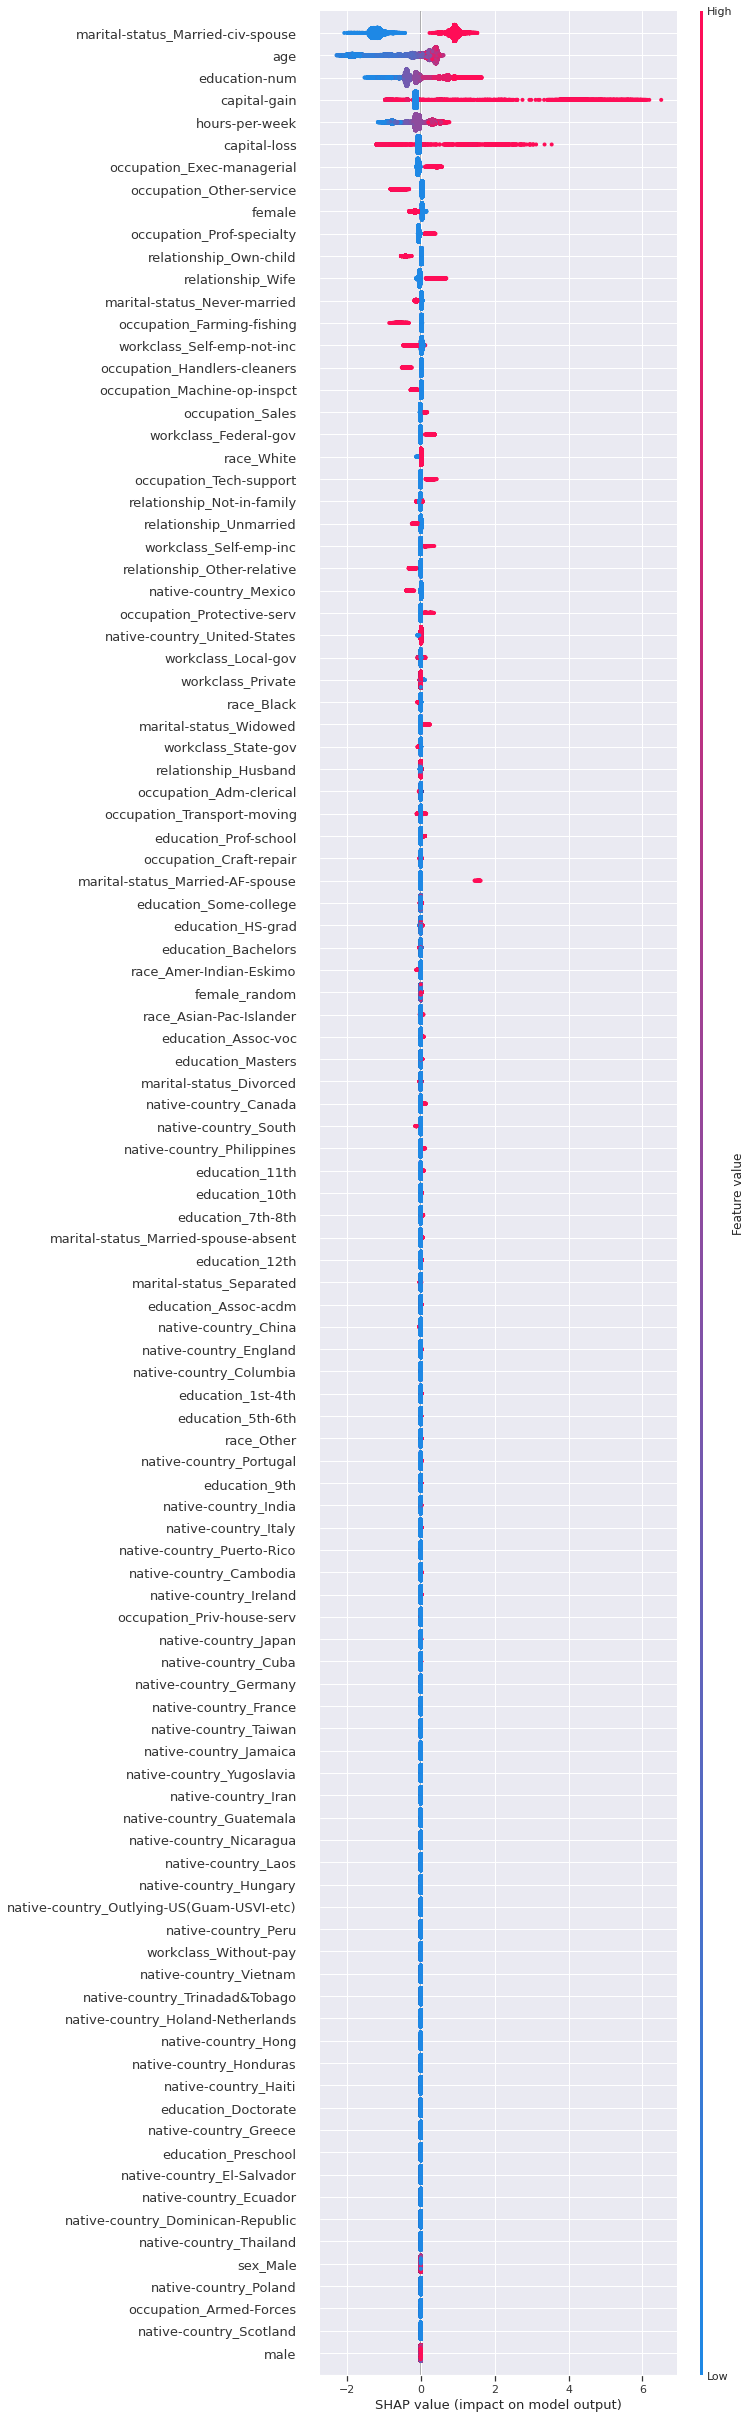

In [19]:
plot_shap_graph("adult")

In [20]:
shap_values = pd.read_csv("Adult_census_shap_randomized_1.csv")
data_final = pd.read_csv("Adult_processed.csv")

In [21]:
sex_female = data_final[(data_final['female']==1)].index
sex_male = data_final[(data_final['female']==0)].index

print("Number of Females  is " + str(len(sex_female)))
print("Number of Males  is " + str(len(sex_male)))

location_female  =  data_final.columns.get_loc("female")
location_male = data_final.columns.get_loc("male")
location_rand = data_final.columns.get_loc("female_random")

Number of Females  is 14695
Number of Males  is 30527


In [22]:
locations_interested = [location_female,location_male, location_rand]

KL Divergence of the two distributions 1.2903394748939536
KL Divergence of the two distributions 2.3561720531983683


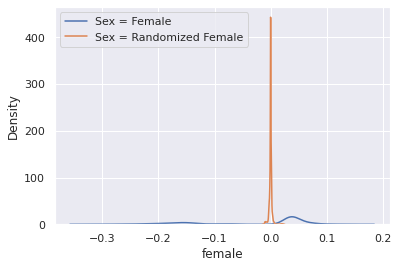

In [23]:
sns.kdeplot(shap_values.iloc[:, location_female], label = 'Sex = Female')
sns.kdeplot(shap_values.iloc[:, location_rand], label = 'Sex = Randomized Female')

pmf_rand =  get_pmf(shap_values.iloc[:, location_rand])
pmf_orig =  get_pmf(shap_values.iloc[:, location_female])
print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

plt.legend()
plt.show()

In [24]:
Y_1_F =  data_final[(data_final['ground_truth']==1) & (data_final['female']==1)].index
Y_1_M = data_final[(data_final['ground_truth']==1) & (data_final['female']==0)].index

Y_1_F_random =  data_final[(data_final['ground_truth']==1) & (data_final['female_random']==1)].index
Y_1_M_random = data_final[(data_final['ground_truth']==1) & (data_final['female_random']==0)].index



Y_0_F =  data_final[(data_final['ground_truth']==0) & (data_final['female']==1)].index
Y_0_M = data_final[(data_final['ground_truth']==0) & (data_final['female']==0)].index

Y_0_F_random =  data_final[(data_final['ground_truth']==0) & (data_final['female_random']==1)].index
Y_0_M_random = data_final[(data_final['ground_truth']==0) & (data_final['female_random']==0)].index
print("Should decrease number of females with low income and increase number of males with low income")
print("Number of Y=0 instances given female: " + str(len(Y_0_F)))
print("Number of Y=0 instances given male: " + str(len(Y_0_M)))
print("Number of Y=0 instances given female_random: " + str(len(Y_0_F_random)))
print("Number of Y=0 instances given male_random: " + str(len(Y_0_M_random)))
print()

print("Should increase number of females with high income and decrease number of males with high income")
print("Number of Y=1 instances given female: " + str(len(Y_1_F)))
print("Number of Y=1 instances given male: " + str(len(Y_1_M)))
print("Number of Y=1 instances given female_random: " + str(len(Y_1_F_random)))
print("Number of Y=1 instances given male_random: " + str(len(Y_1_M_random)))

Should decrease number of females with low income and increase number of males with low income
Number of Y=0 instances given female: 13026
Number of Y=0 instances given male: 20988
Number of Y=0 instances given female_random: 11100
Number of Y=0 instances given male_random: 22914

Should increase number of females with high income and decrease number of males with high income
Number of Y=1 instances given female: 1669
Number of Y=1 instances given male: 9539
Number of Y=1 instances given female_random: 3595
Number of Y=1 instances given male_random: 7613


In [25]:
X=data_final #Hack here
X_set =  X.iloc[Y_0_F]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_0_female_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_0_M]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_0_male_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_0_F_random]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_0_female_random_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_0_M_random]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_0_male_random_values =  shap_values_set.iloc[:, locations_interested]

KL Divergence of the two distributions 1.6723220351221366
KL Divergence of the two distributions 1.7271114620554406


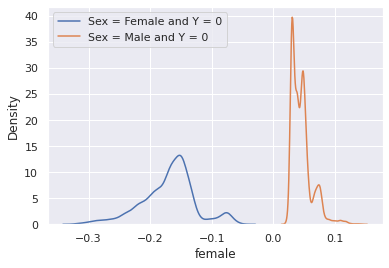

In [26]:
sns.kdeplot(y_0_female_values.iloc[:,0], label = 'Sex = Female and Y = 0')
sns.kdeplot(y_0_male_values.iloc[:,0], label = 'Sex = Male and Y = 0')
pmf_rand =  get_pmf(y_0_female_values.iloc[:,0])
pmf_orig =  get_pmf(y_0_male_values.iloc[:,0])
print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

plt.legend()
plt.show()

KL Divergence of the two distributions 0.02753282190658049
KL Divergence of the two distributions 0.023068613597573447


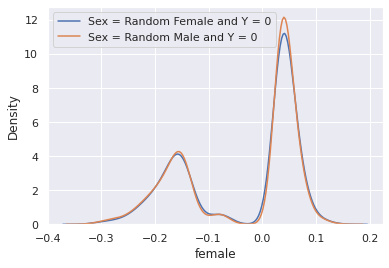

In [27]:
sns.kdeplot(y_0_female_random_values.iloc[:,0], label = 'Sex = Random Female and Y = 0')
sns.kdeplot(y_0_male_random_values.iloc[:,0], label = 'Sex = Random Male and Y = 0')

pmf_rand =  get_pmf(y_0_female_random_values.iloc[:,0])
pmf_orig =  get_pmf(y_0_male_random_values.iloc[:,0])
print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

plt.legend()
plt.show()

In [28]:
X=data_final #Hack here
X_set =  X.iloc[Y_1_F]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_1_female_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_1_M]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_1_male_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_1_F_random]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_1_female_random_values =  shap_values_set.iloc[:, locations_interested]

X_set =  X.iloc[Y_1_M_random]
shap_values_set =  shap_values.iloc[X_set.index,:]
y_1_male_random_values =  shap_values_set.iloc[:, locations_interested]

KL Divergence of the two distributions 2.236778569540467
KL Divergence of the two distributions 2.5893126021762023


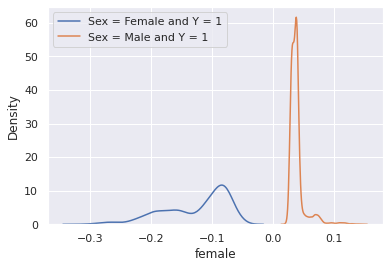

In [29]:
sns.kdeplot(y_1_female_values.iloc[:,0], label = 'Sex = Female and Y = 1')
sns.kdeplot(y_1_male_values.iloc[:,0], label = 'Sex = Male and Y = 1')
pmf_rand =  get_pmf(y_1_female_values.iloc[:,0])
pmf_orig =  get_pmf(y_1_male_values.iloc[:,0])
print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))
plt.legend()
plt.show()

KL Divergence of the two distributions 0.018663501721782223
KL Divergence of the two distributions 0.020026416885267868


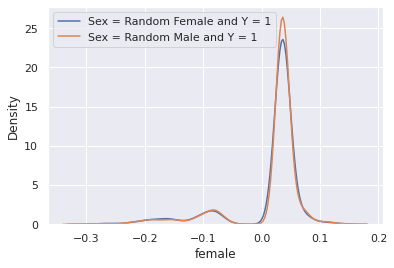

In [30]:
sns.kdeplot(y_1_female_random_values.iloc[:,0], label = 'Sex = Random Female and Y = 1')
sns.kdeplot(y_1_male_random_values.iloc[:,0], label = 'Sex = Random Male and Y = 1')

pmf_rand =  get_pmf(y_1_female_random_values.iloc[:,0])
pmf_orig =  get_pmf(y_1_male_random_values.iloc[:,0])
print("KL Divergence of the two distributions " + str(entropy(pmf_rand + 0.001, pmf_orig +0.001)))
print("KL Divergence of the two distributions " + str(entropy(pmf_orig + 0.001, pmf_rand +0.001)))

plt.legend()
plt.show()